Loading the SDXL Stable Diffusion model, adopting an adapter onto it, fusing them and then finally posting the model onto the hub for ease of access.


In [ ]:
!pip -q uninstall -y huggingface_hub
!pip -q install -U "huggingface_hub>=0.34.0,<1.0" "transformers==4.57.6"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 34.8 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix")

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float32,
    use_safetensors=True,
)

pipe.load_lora_weights(
    "francuzama/tattoo_LoRA",
    weight_name="pytorch_lora_weights.safetensors",
    adapter_name="tattoo",
)

pipe.fuse_lora(lora_scale=1.0)
pipe.unload_lora_weights()

pipe.save_pretrained("./sdxl_fused_tattoo_plain", safe_serialization=True)
pipe.push_to_hub("francuzama/sdxl-fused-tattoo-plain")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/25 [00:00<?, ?it/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...pytorch_model.safetensors:   0%|          |  527kB / 5.15GB            

  ...pytorch_model.safetensors:  20%|##        | 33.6MB /  167MB            

  ...coder_2/model.safetensors:   3%|3         | 41.9MB / 1.39GB            

  ...encoder/model.safetensors:  14%|#3        | 33.5MB /  246MB            

CommitInfo(commit_url='https://huggingface.co/francuzama/sdxl-fused-tattoo/commit/8e9ae761cd0489406332a7b0436ad71a66beda77', commit_message='Upload StableDiffusionXLPipeline', commit_description='', oid='8e9ae761cd0489406332a7b0436ad71a66beda77', pr_url=None, repo_url=RepoUrl('https://huggingface.co/francuzama/sdxl-fused-tattoo', endpoint='https://huggingface.co', repo_type='model', repo_id='francuzama/sdxl-fused-tattoo'), pr_revision=None, pr_num=None)

  0%|          | 0/25 [00:00<?, ?it/s]

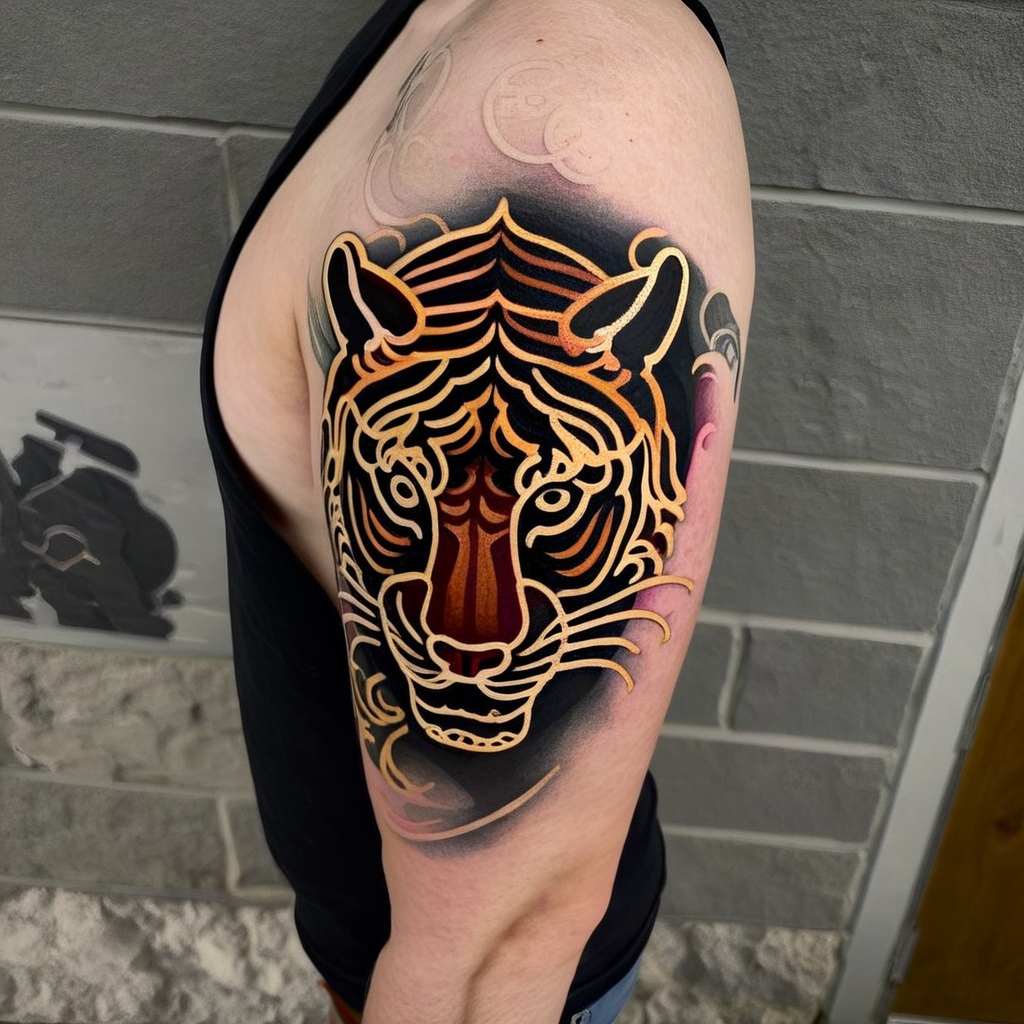

In [ ]:
img = pipe("a tattoo in the style of JASON, a tiger head, bold lines", num_inference_steps=25).images[0]
img

In [ ]:
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file, save_file

repo_fused = "francuzama/sdxl-fused-tattoo-plain"
file_fused = "unet/diffusion_pytorch_model.safetensors"

repo_base  = "stabilityai/stable-diffusion-xl-base-1.0"
file_base  = "unet/diffusion_pytorch_model.fp16.safetensors"

path_a = hf_hub_download(repo_id=repo_fused, filename=file_fused)
path_b = hf_hub_download(repo_id=repo_base,  filename=file_base)

A = load_file(path_a)  # fused UNet weights
B = load_file(path_b)  # base UNet weights

common = sorted(set(A.keys()) & set(B.keys()))
if len(common) != len(A) or len(common) != len(B):
    print("Warning: keys not identical.")
    print("Only in fused (first 20):", sorted(set(A.keys()) - set(B.keys()))[:20])
    print("Only in base  (first 20):", sorted(set(B.keys()) - set(A.keys()))[:20])

delta = {}
for k in common:
    if A[k].shape != B[k].shape:
        raise ValueError(f"Shape mismatch at {k}: {A[k].shape} vs {B[k].shape}")
    delta[k] = A[k] - B[k].to(A[k].dtype)

save_file(delta, "unet_weight_difference.safetensors")
